# NFL's best defenses in 2018

In [2]:
import pandas as pd
import numpy as np
import time
import random
import umap.plot
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
sns.set(style='white')

In [3]:
df_dataset1_week1 = pd.read_csv('datasets/week1.csv', sep=',')

In [4]:
df_dataset1_week1.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-09-07T01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,NaN
1,2018-09-07T01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN
2,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH
3,2018-09-07T01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN
4,2018-09-07T01:07:14.599Z,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH


In [5]:
df_dataset1_week1.loc[527057:527071]

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
527057,2018-09-09T20:01:08.799Z,25.92,39.28,5.64,1.70,0.57,302.66,344.41,pass_outcome_incomplete,494259.0,Barry Church,42.0,SS,63,away,2018090907,3977,left,NaN
527058,2018-09-09T20:01:08.799Z,48.71,24.30,0.81,0.52,0.08,286.64,263.48,pass_outcome_incomplete,2505996.0,Eli Manning,10.0,QB,63,home,2018090907,3977,left,NaN
527059,2018-09-09T20:01:08.799Z,24.99,38.61,3.41,3.65,0.36,247.94,216.46,pass_outcome_incomplete,2532848.0,Tashaun Gipson,39.0,FS,63,away,2018090907,3977,left,NaN
527060,2018-09-09T20:01:08.799Z,23.53,50.96,5.89,10.24,0.45,279.93,272.28,pass_outcome_incomplete,2539237.0,D.J. Hayden,25.0,CB,63,away,2018090907,3977,left,NaN
527061,2018-09-09T20:01:08.799Z,48.84,25.40,0.71,1.13,0.08,221.17,302.54,pass_outcome_incomplete,2539662.0,Lerentee McCray,55.0,OLB,63,away,2018090907,3977,left,NaN
527062,2018-09-09T20:01:08.799Z,35.85,6.83,0.67,0.37,0.09,271.73,307.10,pass_outcome_incomplete,2541162.0,A.J. Bouye,21.0,CB,63,away,2018090907,3977,left,NaN
527063,2018-09-09T20:01:08.799Z,44.82,37.59,1.78,0.95,0.18,294.29,315.51,pass_outcome_incomplete,2543496.0,Odell Beckham,13.0,WR,63,home,2018090907,3977,left,HITCH
527064,2018-09-09T20:01:08.799Z,37.13,6.66,0.24,0.43,0.02,87.06,109.28,pass_outcome_incomplete,2543590.0,Cody Latimer,12.0,WR,63,home,2018090907,3977,left,HITCH
527065,2018-09-09T20:01:08.799Z,37.17,11.21,0.30,1.31,0.03,318.21,252.67,pass_outcome_incomplete,2543711.0,Telvin Smith,50.0,OLB,63,away,2018090907,3977,left,NaN
527066,2018-09-09T20:01:08.799Z,39.86,37.11,1.66,0.90,0.18,323.73,303.08,pass_outcome_incomplete,2555280.0,Jalen Ramsey,20.0,CB,63,away,2018090907,3977,left,NaN


In [6]:
df_dataset1_week1[921078:921092]

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
921078,2018-09-11T02:58:45.400Z,54.49,11.26,4.91,4.06,0.46,NaN,NaN,None,NaN,Football,NaN,NaN,63,football,2018091001,915,right,NaN
921079,2018-09-11T02:58:45.500Z,66.69,11.98,1.72,2.43,0.18,105.56,153.60,None,1032.0,Jordy Nelson,82.0,WR,64,home,2018091001,915,right,HITCH
921080,2018-09-11T02:58:45.500Z,61.30,8.51,3.28,3.41,0.34,293.68,247.43,None,1302.0,Aqib Talib,21.0,CB,64,away,2018091001,915,right,NaN
921081,2018-09-11T02:58:45.500Z,61.47,44.33,1.54,2.25,0.16,113.37,102.64,None,71265.0,Jared Cook,87.0,TE,64,home,2018091001,915,right,FLAT
921082,2018-09-11T02:58:45.500Z,54.98,11.30,5.11,2.11,0.51,93.52,109.26,None,2495663.0,Marshawn Lynch,24.0,RB,64,home,2018091001,915,right,SCREEN
921083,2018-09-11T02:58:45.500Z,63.73,35.26,4.92,0.54,0.49,175.04,190.33,None,2540197.0,Nickell Robey-Coleman,23.0,CB,64,away,2018091001,915,right,NaN
921084,2018-09-11T02:58:45.500Z,60.13,9.16,3.60,3.26,0.37,278.81,294.89,None,2543492.0,Lamarcus Joyner,20.0,FS,64,away,2018091001,915,right,NaN
921085,2018-09-11T02:58:45.500Z,50.17,23.20,1.59,0.39,0.16,144.30,131.43,None,2543499.0,Derek Carr,4.0,QB,64,home,2018091001,915,right,NaN
921086,2018-09-11T02:58:45.500Z,66.65,17.96,4.72,2.22,0.46,202.46,198.50,None,2550597.0,Seth Roberts,10.0,WR,64,home,2018091001,915,right,HITCH
921087,2018-09-11T02:58:45.500Z,67.63,35.16,1.98,0.67,0.20,197.84,197.14,None,2552487.0,Amari Cooper,89.0,WR,64,home,2018091001,915,right,HITCH


In [7]:
df_dataset1_week1[(df_dataset1_week1['gameId'] == 2018090907) & (df_dataset1_week1['playId'] == 1235)]

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
223784,2018-09-09T17:53:12.000Z,79.67,19.89,0.02,0.02,0.00,70.76,111.23,None,494259.0,Barry Church,42.0,SS,1,away,2018090907,1235,left,NaN
223785,2018-09-09T17:53:12.000Z,79.67,19.89,0.02,0.02,0.00,70.76,112.82,None,494259.0,Barry Church,42.0,SS,2,away,2018090907,1235,left,NaN
223786,2018-09-09T17:53:12.000Z,79.67,19.89,0.01,0.01,0.00,70.76,109.94,None,494259.0,Barry Church,42.0,SS,3,away,2018090907,1235,left,NaN
223787,2018-09-09T17:53:12.000Z,79.68,19.89,0.01,0.01,0.00,70.76,109.07,None,494259.0,Barry Church,42.0,SS,4,away,2018090907,1235,left,NaN
223788,2018-09-09T17:53:12.000Z,79.68,19.89,0.01,0.01,0.00,70.76,110.80,None,494259.0,Barry Church,42.0,SS,5,away,2018090907,1235,left,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224889,2018-09-09T17:53:19.000Z,50.25,4.35,7.97,0.95,0.77,NaN,NaN,None,NaN,Football,NaN,NaN,70,football,2018090907,1235,left,NaN
224890,2018-09-09T17:53:19.000Z,49.52,4.04,8.14,1.63,0.80,NaN,NaN,None,NaN,Football,NaN,NaN,71,football,2018090907,1235,left,NaN
224891,2018-09-09T17:53:19.000Z,48.76,3.73,8.29,1.29,0.82,NaN,NaN,None,NaN,Football,NaN,NaN,72,football,2018090907,1235,left,NaN
224892,2018-09-09T17:53:19.000Z,48.00,3.42,8.28,0.23,0.83,NaN,NaN,pass_outcome_incomplete,NaN,Football,NaN,NaN,73,football,2018090907,1235,left,NaN


In [8]:
df_dataset1_week1[(df_dataset1_week1['gameId'] == 2018090907) & (df_dataset1_week1['playId'] == 1235)]

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
223784,2018-09-09T17:53:12.000Z,79.67,19.89,0.02,0.02,0.00,70.76,111.23,None,494259.0,Barry Church,42.0,SS,1,away,2018090907,1235,left,NaN
223785,2018-09-09T17:53:12.000Z,79.67,19.89,0.02,0.02,0.00,70.76,112.82,None,494259.0,Barry Church,42.0,SS,2,away,2018090907,1235,left,NaN
223786,2018-09-09T17:53:12.000Z,79.67,19.89,0.01,0.01,0.00,70.76,109.94,None,494259.0,Barry Church,42.0,SS,3,away,2018090907,1235,left,NaN
223787,2018-09-09T17:53:12.000Z,79.68,19.89,0.01,0.01,0.00,70.76,109.07,None,494259.0,Barry Church,42.0,SS,4,away,2018090907,1235,left,NaN
223788,2018-09-09T17:53:12.000Z,79.68,19.89,0.01,0.01,0.00,70.76,110.80,None,494259.0,Barry Church,42.0,SS,5,away,2018090907,1235,left,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224889,2018-09-09T17:53:19.000Z,50.25,4.35,7.97,0.95,0.77,NaN,NaN,None,NaN,Football,NaN,NaN,70,football,2018090907,1235,left,NaN
224890,2018-09-09T17:53:19.000Z,49.52,4.04,8.14,1.63,0.80,NaN,NaN,None,NaN,Football,NaN,NaN,71,football,2018090907,1235,left,NaN
224891,2018-09-09T17:53:19.000Z,48.76,3.73,8.29,1.29,0.82,NaN,NaN,None,NaN,Football,NaN,NaN,72,football,2018090907,1235,left,NaN
224892,2018-09-09T17:53:19.000Z,48.00,3.42,8.28,0.23,0.83,NaN,NaN,pass_outcome_incomplete,NaN,Football,NaN,NaN,73,football,2018090907,1235,left,NaN


In [9]:
df_dataset1_week1[(df_dataset1_week1['gameId'] == 2018091001) & (df_dataset1_week1['playId'] == 980)]

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
922159,2018-09-11T03:02:44.000Z,49.34,17.25,0.19,0.67,0.02,275.25,137.53,line_set,1032.0,Jordy Nelson,82.0,WR,1,home,2018091001,980,left,IN
922160,2018-09-11T03:02:44.000Z,42.34,34.15,1.05,0.19,0.11,116.69,285.35,line_set,1302.0,Aqib Talib,21.0,CB,1,away,2018091001,980,left,NaN
922161,2018-09-11T03:02:44.000Z,49.49,28.68,0.44,0.55,0.04,261.58,225.50,line_set,71265.0,Jared Cook,87.0,TE,1,home,2018091001,980,left,CORNER
922162,2018-09-11T03:02:44.000Z,38.03,22.33,0.43,0.69,0.04,83.68,286.72,line_set,2543492.0,Lamarcus Joyner,20.0,FS,1,away,2018091001,980,left,NaN
922163,2018-09-11T03:02:44.000Z,49.35,23.70,0.34,0.18,0.03,271.95,292.00,line_set,2543499.0,Derek Carr,4.0,QB,1,home,2018091001,980,left,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923489,2018-09-11T03:02:52.799Z,38.56,45.85,4.52,1.55,0.45,285.37,294.26,None,2556593.0,Cory Littleton,58.0,ILB,89,away,2018091001,980,left,NaN
923490,2018-09-11T03:02:52.799Z,45.62,14.51,3.61,0.57,0.36,295.07,306.73,None,2556885.0,Jalen Richard,30.0,RB,89,home,2018091001,980,left,NaN
923491,2018-09-11T03:02:52.799Z,24.57,53.27,0.53,2.02,0.06,259.45,36.21,None,2558183.0,John Johnson,43.0,SS,89,away,2018091001,980,left,NaN
923492,2018-09-11T03:02:52.799Z,41.17,31.26,4.65,0.99,0.47,303.11,299.47,None,2558830.0,Samson Ebukam,50.0,OLB,89,away,2018091001,980,left,NaN


In [10]:
df_dataset1_week1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986022 entries, 0 to 986021
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   time           986022 non-null  object 
 1   x              986022 non-null  float64
 2   y              986022 non-null  float64
 3   s              986022 non-null  float64
 4   a              986022 non-null  float64
 5   dis            986022 non-null  float64
 6   o              919109 non-null  float64
 7   dir            919109 non-null  float64
 8   event          986022 non-null  object 
 9   nflId          919109 non-null  float64
 10  displayName    986022 non-null  object 
 11  jerseyNumber   919109 non-null  float64
 12  position       919109 non-null  object 
 13  frameId        986022 non-null  int64  
 14  team           986022 non-null  object 
 15  gameId         986022 non-null  int64  
 16  playId         986022 non-null  int64  
 17  playDirection  986022 non-nul

In [11]:
df_dataset1_week1.isna().sum()

time                  0
x                     0
y                     0
s                     0
a                     0
dis                   0
o                 66913
dir               66913
event                 0
nflId             66913
displayName           0
jerseyNumber      66913
position          66913
frameId               0
team                  0
gameId                0
playId                0
playDirection         0
route            712708
dtype: int64

In [12]:
df_dataset1_week1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
986017    False
986018    False
986019    False
986020    False
986021    False
Length: 986022, dtype: bool

In [13]:
df_dataset1_week1[(df_dataset1_week1['gameId'] == 2018090907) & (df_dataset1_week1['team'] == 'away')]

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
79713,2018-09-09T17:03:48.900Z,95.36,23.88,0.07,0.07,0.01,244.25,268.28,None,2543477.0,Blake Bortles,5.0,QB,1,away,2018090907,79,left,NaN
79714,2018-09-09T17:03:48.900Z,91.71,43.43,0.00,0.00,0.00,223.73,342.51,None,2543614.0,Donte Moncrief,10.0,WR,1,away,2018090907,79,left,HITCH
79715,2018-09-09T17:03:48.900Z,91.84,18.95,0.00,0.00,0.00,336.89,244.72,None,2543683.0,Austin Seferian-Jenkins,88.0,TE,1,away,2018090907,79,left,HITCH
79720,2018-09-09T17:03:48.900Z,91.99,32.48,0.00,0.00,0.00,253.48,214.98,None,2557895.0,Dede Westbrook,12.0,WR,1,away,2018090907,79,left,HITCH
79721,2018-09-09T17:03:48.900Z,95.34,26.32,0.00,0.00,0.00,245.75,52.08,None,2557973.0,Leonard Fournette,27.0,RB,1,away,2018090907,79,left,FLAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527076,2018-09-09T20:01:08.900Z,48.78,25.44,0.62,0.99,0.07,220.25,301.60,None,2539662.0,Lerentee McCray,55.0,OLB,64,away,2018090907,3977,left,NaN
527077,2018-09-09T20:01:08.900Z,35.79,6.89,0.68,0.29,0.08,277.16,310.44,None,2541162.0,A.J. Bouye,21.0,CB,64,away,2018090907,3977,left,NaN
527080,2018-09-09T20:01:08.900Z,37.15,11.21,0.21,1.17,0.02,320.14,276.06,None,2543711.0,Telvin Smith,50.0,OLB,64,away,2018090907,3977,left,NaN
527081,2018-09-09T20:01:08.900Z,39.75,37.22,1.63,0.40,0.16,323.73,306.45,None,2555280.0,Jalen Ramsey,20.0,CB,64,away,2018090907,3977,left,NaN


In [14]:
df_dataset1_week1[(df_dataset1_week1['frameId'] == 60) & (df_dataset1_week1['gameId'] == 2018090907) & (df_dataset1_week1['playId']== 1235)]

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
224641,2018-09-09T17:53:18.000Z,80.86,14.96,0.72,1.69,0.08,274.76,152.24,None,494259.0,Barry Church,42.0,SS,60,away,2018090907,1235,left,NaN
224651,2018-09-09T17:53:18.000Z,91.82,23.49,0.23,0.68,0.02,226.12,132.91,None,2505996.0,Eli Manning,10.0,QB,60,home,2018090907,1235,left,NaN
224661,2018-09-09T17:53:18.000Z,88.84,25.17,2.85,1.51,0.29,259.33,261.41,None,2532835.0,Rhett Ellison,85.0,TE,60,home,2018090907,1235,left,NaN
224671,2018-09-09T17:53:18.000Z,55.78,12.86,8.79,0.18,0.88,165.19,214.63,None,2532848.0,Tashaun Gipson,39.0,FS,60,away,2018090907,1235,left,NaN
224681,2018-09-09T17:53:18.000Z,93.17,26.43,3.69,3.25,0.37,230.83,297.85,None,2539662.0,Lerentee McCray,55.0,OLB,60,away,2018090907,1235,left,NaN
224691,2018-09-09T17:53:18.000Z,60.92,12.15,5.70,2.73,0.58,268.43,256.71,None,2541162.0,A.J. Bouye,21.0,CB,60,away,2018090907,1235,left,NaN
224701,2018-09-09T17:53:18.000Z,82.63,17.30,3.16,1.71,0.32,209.19,175.90,None,2543496.0,Odell Beckham,13.0,WR,60,home,2018090907,1235,left,NaN
224711,2018-09-09T17:53:18.000Z,59.28,10.82,8.91,0.92,0.89,253.05,230.26,None,2543711.0,Telvin Smith,50.0,OLB,60,away,2018090907,1235,left,NaN
224721,2018-09-09T17:53:18.000Z,62.19,30.20,4.91,1.38,0.49,195.80,228.19,None,2555280.0,Jalen Ramsey,20.0,CB,60,away,2018090907,1235,left,NaN
224731,2018-09-09T17:53:18.000Z,60.78,11.81,5.15,2.79,0.53,275.69,254.42,None,2555295.0,Sterling Shepard,87.0,WR,60,home,2018090907,1235,left,NaN


In [15]:
df_dataset1_week1[(df_dataset1_week1['frameId'] == 2) & (df_dataset1_week1['gameId'] == 2018091001) & (df_dataset1_week1['playId']== 980)]

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
922174,2018-09-11T03:02:44.099Z,49.36,17.24,0.16,0.42,0.01,271.91,120.94,None,1032.0,Jordy Nelson,82.0,WR,2,home,2018091001,980,left,IN
922175,2018-09-11T03:02:44.099Z,42.24,34.19,1.07,0.11,0.11,115.20,286.10,None,1302.0,Aqib Talib,21.0,CB,2,away,2018091001,980,left,NaN
922176,2018-09-11T03:02:44.099Z,49.47,28.65,0.33,0.76,0.04,265.53,220.60,None,71265.0,Jared Cook,87.0,TE,2,home,2018091001,980,left,CORNER
922177,2018-09-11T03:02:44.099Z,37.98,22.34,0.53,0.80,0.05,83.68,281.00,None,2543492.0,Lamarcus Joyner,20.0,FS,2,away,2018091001,980,left,NaN
922178,2018-09-11T03:02:44.099Z,49.32,23.70,0.30,0.15,0.03,271.01,283.61,None,2543499.0,Derek Carr,4.0,QB,2,home,2018091001,980,left,NaN
922179,2018-09-11T03:02:44.099Z,52.87,26.40,0.08,0.09,0.01,271.86,248.14,None,2550400.0,Keith Smith,41.0,FB,2,home,2018091001,980,left,NaN
922180,2018-09-11T03:02:44.099Z,44.00,23.46,0.85,0.70,0.09,99.70,152.04,None,2552320.0,Ramik Wilson,52.0,ILB,2,away,2018091001,980,left,NaN
922181,2018-09-11T03:02:44.099Z,50.80,32.67,0.36,0.86,0.04,269.83,26.90,None,2552487.0,Amari Cooper,89.0,WR,2,home,2018091001,980,left,POST
922182,2018-09-11T03:02:44.099Z,47.43,16.34,0.25,0.31,0.03,48.68,65.98,None,2552488.0,Marcus Peters,22.0,CB,2,away,2018091001,980,left,NaN
922183,2018-09-11T03:02:44.099Z,46.68,18.66,1.41,0.75,0.15,67.53,134.50,None,2553722.0,Matt Longacre,96.0,OLB,2,away,2018091001,980,left,NaN


In [16]:
df_dataset1_week1.shape

(986022, 19)

In [17]:
median_degrees1 = df_dataset1_week1['o'].median()

In [18]:
df_dataset1_week1.update(df_dataset1_week1['o'].fillna(median_degrees1))

In [19]:
median_distance = df_dataset1_week1['dir'].median()

In [20]:
df_dataset1_week1.update(df_dataset1_week1['dir'].fillna(median_distance))

In [21]:
impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [22]:
impute_zeros.fit(X=df_dataset1_week1)

df_dataset1_week1 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_dataset1_week1
    ),
    columns=df_dataset1_week1.columns
)
df_dataset1_week1.isnull().sum()

time             0
x                0
y                0
s                0
a                0
dis              0
o                0
dir              0
event            0
nflId            0
displayName      0
jerseyNumber     0
position         0
frameId          0
team             0
gameId           0
playId           0
playDirection    0
route            0
dtype: int64

In [23]:
df_dataset2_week1 = df_dataset1_week1.drop(columns=['time', 'event','nflId','frameId','team','gameId','playId'], inplace=False)

In [24]:
df_dataset2_week1.sample(n=60)

,x,y,s,a,dis,o,dir,displayName,jerseyNumber,position,playDirection,route
688001,107.46,38.40,0.11,0.58,0.02,240.75,49.84,Ricky Seals-Jones,86.0,TE,right,0
889235,94.29,21.59,1.31,1.69,0.12,239.56,42.51,Jamal Adams,33.0,SS,right,0
129712,57.37,46.53,2.84,3.42,0.30,305.81,332.87,Lavonte David,54.0,OLB,left,0
143130,107.98,23.62,3.01,1.07,0.30,337.73,84.57,Deshaun Watson,4.0,QB,left,0
440144,34.77,48.05,0.11,0.98,0.01,255.03,259.98,A.J. Green,18.0,WR,left,HITCH
739557,54.77,9.72,6.44,3.40,0.66,274.05,286.02,Tajae Sharpe,19.0,WR,left,GO
484935,51.75,19.04,0.00,0.00,0.01,254.92,211.58,Tyler Boyd,83.0,WR,left,POST
566340,77.84,42.79,7.07,3.66,0.72,212.03,299.68,James Conner,30.0,RB,left,OUT
355263,91.10,29.63,0.55,0.38,0.07,334.75,233.63,Derrick Kindred,26.0,SS,right,0
722005,65.26,10.48,0.27,0.40,0.03,233.85,223.38,Bobby McCain,28.0,CB,left,0


In [25]:
df_dataset2_week1.head()

,x,y,s,a,dis,o,dir,displayName,jerseyNumber,position,playDirection,route
0,91.73,26.67,0.00,0.01,0.02,289.57,240.93,Matt Ryan,2.0,QB,left,0
1,88.89,36.47,0.01,0.01,0.01,105.63,66.66,Malcolm Jenkins,27.0,SS,left,0
2,91.35,44.16,0.02,0.03,0.01,290.45,16.86,Julio Jones,11.0,WR,left,HITCH
3,86.31,22.01,0.09,0.42,0.01,70.12,168.91,Corey Graham,24.0,FS,left,0
4,90.78,36.15,0.00,0.00,0.00,257.61,193.97,Mohamed Sanu,12.0,WR,left,HITCH


In [26]:
df_dataset2_week1.dtypes

x                float64
y                float64
s                float64
a                float64
dis              float64
o                float64
dir              float64
displayName       object
jerseyNumber     float64
position          object
playDirection     object
route             object
dtype: object

In [27]:
df_dataset3_week1 = df_dataset2_week1.loc[:,['x','y','s','a','dis','o','dir']]

In [28]:
df_dataset3_week1.describe()

,x,y,s,a,dis,o,dir
count,986022.000000,986022.000000,986022.000000,986022.000000,986022.000000,986022.000000,986022.000000
mean,58.975056,26.795439,3.187303,2.012526,0.323366,179.401656,181.249956
std,24.935961,11.204589,2.843484,1.689410,0.307017,97.230958,99.410058
min,-5.980000,-11.740000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.980000,19.000000,0.850000,0.740000,0.090000,92.590000,96.060000
50%,59.100000,26.830000,2.790000,1.750000,0.280000,177.430000,181.410000
75%,78.190000,34.710000,4.960000,2.940000,0.500000,266.580000,266.960000
max,128.380000,62.750000,27.370000,58.330000,7.120000,360.000000,360.000000


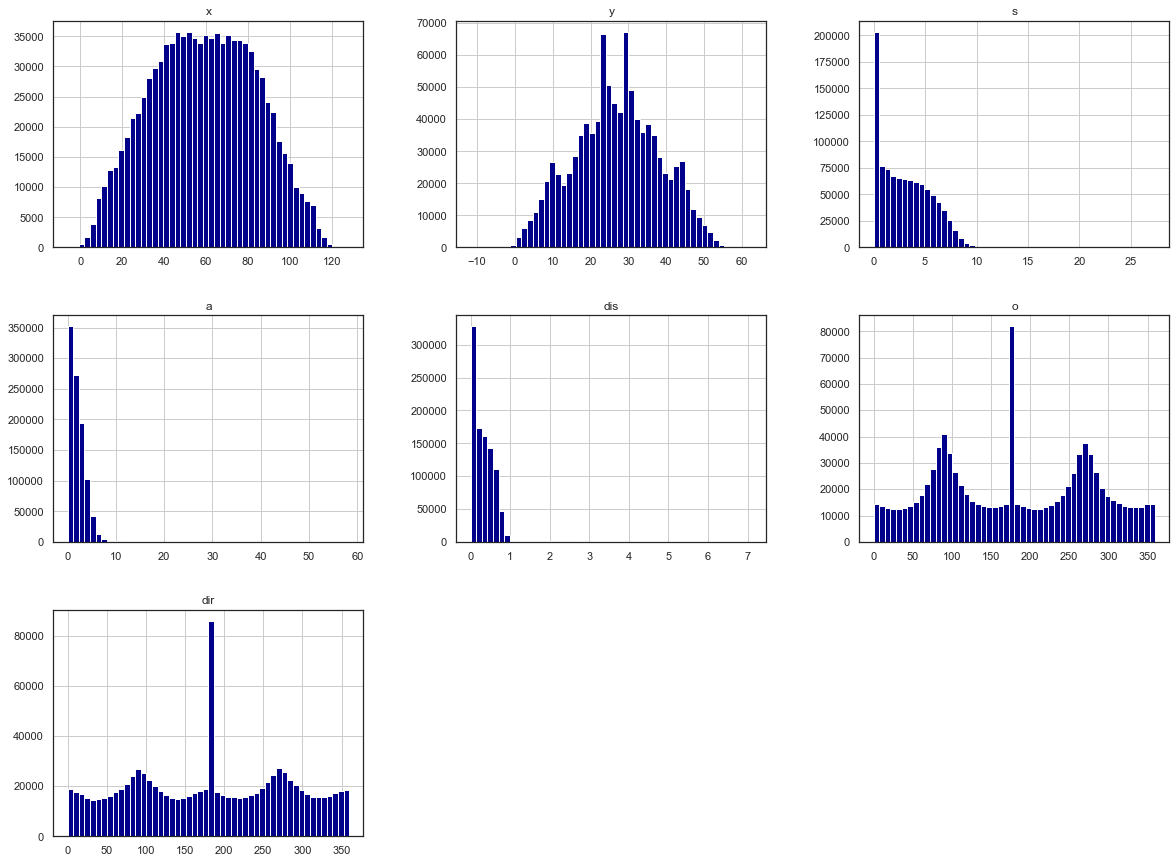

In [29]:
#The Histogram for each numerical atribute 
df_dataset3_week1.hist(bins=50, figsize=(20,15),facecolor='darkblue')
plt.show()

In [30]:
print('Unique values in `state` column:', list(df_dataset2_week1.position.unique()))

Unique values in `state` column: ['QB', 'SS', 'WR', 'FS', 'RB', 'MLB', 'CB', 'TE', 'LB', 'FB', 0, 'OLB', 'HB', 'ILB', 'DL', 'DB', 'NT', 'S', 'DE']


   # JACKSONVILLE JAGUARS vs NEW YORK GIANTS
Nice plays on defense for Jacksonville. This team is so fast to the football those type of plays and the discipline of the defensive scheme to top that play.

In [31]:
df_dataset2_week1.loc[[223784,223791,223798,223805,223812,223819,223826,223833,223840,223847,223854,223861,223868,223875],:]

,x,y,s,a,dis,o,dir,displayName,jerseyNumber,position,playDirection,route
223784,79.67,19.89,0.02,0.02,0.00,70.76,111.23,Barry Church,42.0,SS,left,0
223791,86.35,23.41,0.01,0.01,0.01,266.73,69.88,Eli Manning,10.0,QB,left,0
223798,87.22,28.25,0.00,0.00,0.00,344.12,191.44,Rhett Ellison,85.0,TE,left,0
223805,72.16,30.12,1.20,0.22,0.12,71.02,266.72,Tashaun Gipson,39.0,FS,left,0
223812,84.12,18.09,0.00,0.00,0.00,154.85,87.32,Lerentee McCray,55.0,OLB,left,0
223819,83.35,9.22,0.53,2.00,0.04,54.30,241.21,A.J. Bouye,21.0,CB,left,0
223826,87.66,32.39,0.00,0.00,0.00,246.34,68.99,Odell Beckham,13.0,WR,left,0
223833,78.04,24.06,0.02,0.03,0.00,91.57,265.19,Telvin Smith,50.0,OLB,left,0
223840,79.28,34.81,0.02,0.02,0.01,93.30,15.23,Jalen Ramsey,20.0,CB,left,0
223847,86.11,9.18,0.00,0.00,0.00,282.48,111.21,Sterling Shepard,87.0,WR,left,0


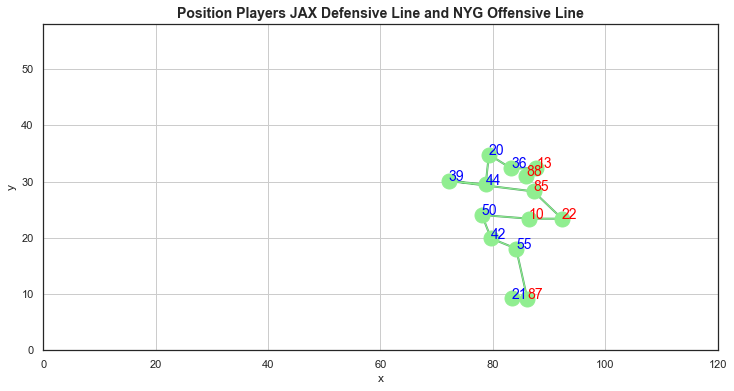

In [32]:
verts = [
    (83.35,9.22),#jerseyNumber21
    (86.11,9.18),#jerseyNumber87
    (84.12,18.09),#jerseyNumber55
    (79.67,19.89),#jerseyNumber42
    (78.04,24.06),#jerseyNumber50
    (86.35,23.41),#jerseyNumber10
    (92.29,23.40),#jerseyNumber22
    (87.22,28.25),#jerseyNumber85
    (72.16,30.12),#jerseyNumber39
    (78.71,29.49),#jerseyNumber44
    (79.28,34.81),#jerseyNumber20
    (83.25,32.34),#jerseyNumber36
    (87.66,32.39),#jerseyNumber13
    (85.92,30.95),#jerseyNumber88
    
]
codes = [Path.MOVETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        ]

path = Path(verts, codes)
plt.figure(figsize=(18,6))
patch = patches.PathPatch(path, facecolor='none',edgecolor='g', lw=2)
ax = plt.gca()
ax.add_patch(patch)
xs, ys =zip(*verts)
ax.plot(xs, ys,'o-', lw=1, color='lightgreen', ms=15)
ax.text(83.35, 9.22, '21', color='blue',fontsize=14)
ax.text(86.11, 9.18, '87', color='red',fontsize=14)
ax.text(84.12, 18.09, '55', color='blue',fontsize=14)
ax.text(79.67, 19.89, '42', color='blue',fontsize=14)
ax.text(78.04, 24.06, '50', color='blue',fontsize=14)
ax.text(86.35, 23.41, '10', color='red',fontsize=14)
ax.text(92.29,23.40, '22', color='red',fontsize=14)
ax.text(87.22, 28.25, '85', color='red',fontsize=14)
ax.text(72.16, 30.12, '39', color='blue',fontsize=14)
ax.text(78.71,29.49, '44', color='blue',fontsize=14)
ax.text(79.28, 34.81, '20', color='blue',fontsize=14)
ax.text(83.25,32.34,'36', color='blue',fontsize=14)
ax.text(87.66, 32.39,'13', color='red',fontsize=14)
ax.text(85.92,30.95, '88', color='red',fontsize=14)
ax.set_xlim(0,120)
ax.set_ylim(0,58)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Position Players JAX Defensive Line and NYG Offensive Line',fontsize=14, fontweight='bold')
ax.set_aspect("equal")
ax.grid()
plt.show()

In [33]:
df_dataset2_week1['jerseyNumber'] = df_dataset2_week1['jerseyNumber'].apply(np.int64)

In [34]:
df_dataset2_week1.loc[527057:527071]

,x,y,s,a,dis,o,dir,displayName,jerseyNumber,position,playDirection,route
527057,25.92,39.28,5.64,1.70,0.57,302.66,344.41,Barry Church,42,SS,left,0
527058,48.71,24.30,0.81,0.52,0.08,286.64,263.48,Eli Manning,10,QB,left,0
527059,24.99,38.61,3.41,3.65,0.36,247.94,216.46,Tashaun Gipson,39,FS,left,0
527060,23.53,50.96,5.89,10.24,0.45,279.93,272.28,D.J. Hayden,25,CB,left,0
527061,48.84,25.40,0.71,1.13,0.08,221.17,302.54,Lerentee McCray,55,OLB,left,0
527062,35.85,6.83,0.67,0.37,0.09,271.73,307.10,A.J. Bouye,21,CB,left,0
527063,44.82,37.59,1.78,0.95,0.18,294.29,315.51,Odell Beckham,13,WR,left,HITCH
527064,37.13,6.66,0.24,0.43,0.02,87.06,109.28,Cody Latimer,12,WR,left,HITCH
527065,37.17,11.21,0.30,1.31,0.03,318.21,252.67,Telvin Smith,50,OLB,left,0
527066,39.86,37.11,1.66,0.90,0.18,323.73,303.08,Jalen Ramsey,20,CB,left,0


In [35]:
df_dataset2_week1.drop(527071, inplace=True)

In [36]:
df_dataset4_week1 = df_dataset2_week1.loc[527057:527070,['x','y','jerseyNumber','position']]

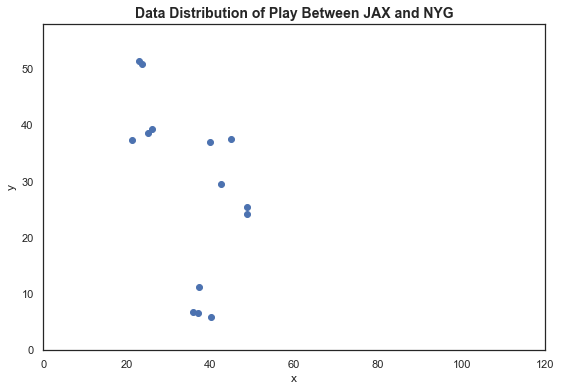

In [37]:
plt.figure(figsize=(9,6))
plt.scatter(df_dataset4_week1.loc[527057:527070,'x'],df_dataset4_week1.loc[527057:527070,'y'])
plt.xlim(0,120)
plt.ylim(0,58)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Distribution of Play Between JAX and NYG',fontsize=14, fontweight='bold')
plt.show()

In [38]:
kmeans = KMeans(
    init='random',
    n_clusters=13,
    n_init=10,
    max_iter=300,
    random_state=42
   )

In [39]:
kmeans.fit(df_dataset4_week1.loc[527057:527070,['x','y']])

KMeans(init='random', n_clusters=13, random_state=42)

In [40]:
kmeans.labels_

array([ 9,  0,  8,  7,  0, 11,  6,  5, 10, 12,  3,  2,  4,  1])

In [41]:
kmeans.inertia_

0.6134499999999979

In [42]:
 kmeans.cluster_centers_

array([[48.775, 24.85 ],
       [40.19 ,  5.96 ],
       [42.57 , 29.57 ],
       [22.9  , 51.49 ],
       [21.33 , 37.45 ],
       [37.13 ,  6.66 ],
       [44.82 , 37.59 ],
       [23.53 , 50.96 ],
       [24.99 , 38.61 ],
       [25.92 , 39.28 ],
       [37.17 , 11.21 ],
       [35.85 ,  6.83 ],
       [39.86 , 37.11 ]])

In [43]:
 kmeans.n_iter_

3

In [44]:
kmeans_labels = kmeans.fit_predict(df_dataset4_week1.loc[527057:527070,['x','y']])

In [45]:
kmeans_labels

array([ 9,  0,  8,  7,  0, 11,  6,  5, 10, 12,  3,  2,  4,  1])

In [46]:
df_dataset4_week1['player'] = kmeans_labels
df_dataset4_week1

,x,y,jerseyNumber,position,player
527057,25.92,39.28,42,SS,9
527058,48.71,24.30,10,QB,0
527059,24.99,38.61,39,FS,8
527060,23.53,50.96,25,CB,7
527061,48.84,25.40,55,OLB,0
527062,35.85,6.83,21,CB,11
527063,44.82,37.59,13,WR,6
527064,37.13,6.66,12,WR,5
527065,37.17,11.21,50,OLB,10
527066,39.86,37.11,20,CB,12


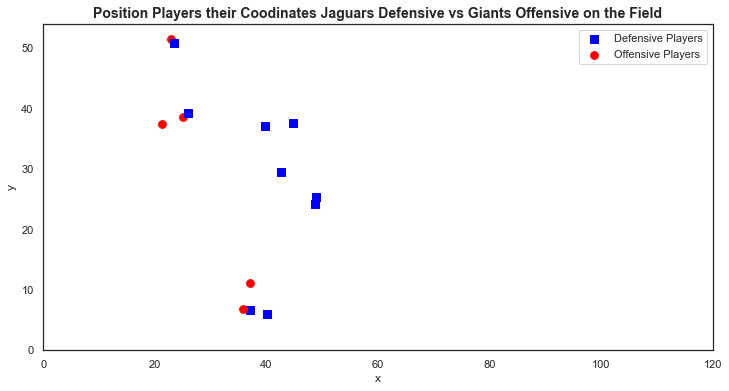

In [47]:
df_dataset_player1 = df_dataset4_week1[df_dataset4_week1.player==0]
df_dataset_player2 = df_dataset4_week1[df_dataset4_week1.player==1]
df_dataset_player3 = df_dataset4_week1[df_dataset4_week1.player==2]
df_dataset_player4 = df_dataset4_week1[df_dataset4_week1.player==3]
df_dataset_player5 = df_dataset4_week1[df_dataset4_week1.player==4]
df_dataset_player6 = df_dataset4_week1[df_dataset4_week1.player==5]
df_dataset_player7 = df_dataset4_week1[df_dataset4_week1.player==6]
df_dataset_player8 = df_dataset4_week1[df_dataset4_week1.player==7]
df_dataset_player9 = df_dataset4_week1[df_dataset4_week1.player==8]
df_dataset_player10 = df_dataset4_week1[df_dataset4_week1.player==9]
df_dataset_player11 = df_dataset4_week1[df_dataset4_week1.player==10]
df_dataset_player12 = df_dataset4_week1[df_dataset4_week1.player==11]
df_dataset_player13 = df_dataset4_week1[df_dataset4_week1.player==12]
plt.figure(figsize=(12,6))
plt.scatter(df_dataset_player1.x,df_dataset_player1.y,color='blue', s=60, marker="s")
plt.scatter(df_dataset_player2.x,df_dataset_player2.y,color='blue', s=60, marker="s")
plt.scatter(df_dataset_player3.x,df_dataset_player3.y,color='blue', label='Defensive Players', s=60, marker="s")
plt.scatter(df_dataset_player4.x,df_dataset_player4.y,color='red', label='Offensive Players', s=60, marker="o")
plt.scatter(df_dataset_player5.x,df_dataset_player5.y,color='red', s=60, marker="o")
plt.scatter(df_dataset_player6.x,df_dataset_player6.y,color='blue', s=60, marker="s")
plt.scatter(df_dataset_player7.x,df_dataset_player7.y,color='blue', s=60, marker="s")
plt.scatter(df_dataset_player8.x,df_dataset_player8.y,color='blue', s=60, marker="s")
plt.scatter(df_dataset_player9.x,df_dataset_player9.y,color='red', s=60, marker="o")
plt.scatter(df_dataset_player10.x,df_dataset_player10.y,color='blue', s=60, marker="s")
plt.scatter(df_dataset_player11.x,df_dataset_player11.y,color='red', s=60, marker="o")
plt.scatter(df_dataset_player12.x,df_dataset_player12.y,color='red', s=60, marker="o")
plt.scatter(df_dataset_player13.x,df_dataset_player13.y,color='blue', s=60, marker="s")
plt.xlim(0,120)
plt.ylim(0,54)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Position Players their Coodinates Jaguars Defensive vs Giants Offensive on the Field',fontsize=14, fontweight='bold')
plt.show()

# LOS ANGELES RAMS vs OAKLAND RAIDERS
The Los Angeles Rams team have a Lot of potencial defensive scheme, their cornerbacks in Talib and Peters that have a combined seven pro bowls, re-sign one of the most effective nickel cornerbacks in the league in Robey-Coleman,a safety that put forth arguably the best season at his position in the league.Defensive tackle Aaron Donald was the defensive player of the year in the NFL season pro bowl selection 2017.

In [48]:
df_dataset2_week1[921078:921092]

,x,y,s,a,dis,o,dir,displayName,jerseyNumber,position,playDirection,route
921079,66.69,11.98,1.72,2.43,0.18,105.56,153.60,Jordy Nelson,82,WR,right,HITCH
921080,61.30,8.51,3.28,3.41,0.34,293.68,247.43,Aqib Talib,21,CB,right,0
921081,61.47,44.33,1.54,2.25,0.16,113.37,102.64,Jared Cook,87,TE,right,FLAT
921082,54.98,11.30,5.11,2.11,0.51,93.52,109.26,Marshawn Lynch,24,RB,right,SCREEN
921083,63.73,35.26,4.92,0.54,0.49,175.04,190.33,Nickell Robey-Coleman,23,CB,right,0
921084,60.13,9.16,3.60,3.26,0.37,278.81,294.89,Lamarcus Joyner,20,FS,right,0
921085,50.17,23.20,1.59,0.39,0.16,144.30,131.43,Derek Carr,4,QB,right,0
921086,66.65,17.96,4.72,2.22,0.46,202.46,198.50,Seth Roberts,10,WR,right,HITCH
921087,67.63,35.16,1.98,0.67,0.20,197.84,197.14,Amari Cooper,89,WR,right,HITCH
921088,76.24,38.39,2.40,0.90,0.24,213.81,220.64,Marcus Peters,22,CB,right,0


In [49]:
df_dataset5_week1 =  df_dataset2_week1[921078:921092]

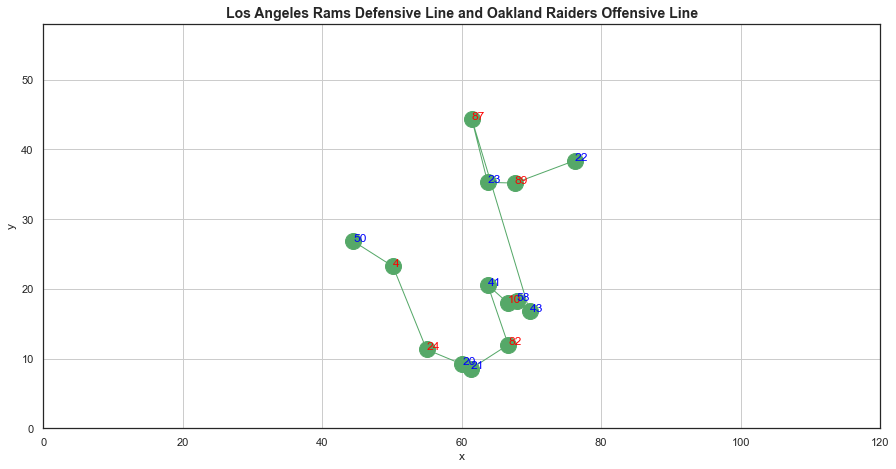

In [50]:

verts1 = [
     (44.47,26.83),#Jersey50
    (50.17,23.20),#Jersey4
    (54.98,11.30),#Jersey24
    (60.13,9.16), #Jersey20
    (61.30,8.51), #Jersey21
    (66.69,11.98),#Jersey82
    (63.76,20.53),#Jersey41
    (66.65,17.96),#Jersey10
    (67.89,18.27),#Jersey58
    (69.75,16.78),#Jersey43
    (61.47,44.33),#Jersey87
    (63.73,35.26),#Jersey23
    (67.63,35.16),#Jersey89
    (76.24,38.39),#Jersey22
    
]
codes1 = [Path.MOVETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        ]

path1 = Path(verts1, codes1)
plt.figure(figsize=(15,9))
patch1 = patches.PathPatch(path1, facecolor='none',edgecolor='g', lw=1)
ax = plt.gca()
ax.add_patch(patch1)
xs, ys =zip(*verts1)
ax.plot(xs, ys,'o', lw=1, color='g', ms=16)
ax.text(44.47,26.83, '50', color='blue')
ax.text(50.17,23.20, '4', color='red')
ax.text(54.98,11.30, '24', color='red')
ax.text(60.13,9.16, '20', color='blue')
ax.text(61.30,8.51, '21', color='blue')
ax.text(66.69,11.98, '82', color='red')
ax.text(63.76,20.53,'41', color='blue')
ax.text(66.65,17.96, '10', color='red')
ax.text(67.89,18.27, '58', color='blue')
ax.text(69.75,16.78, '43', color='blue')
ax.text(61.47,44.33, '87', color='red')
ax.text(63.73,35.26, '23', color='blue')
ax.text(67.63,35.16, '89', color='red')
ax.text(76.24,38.39,'22', color='blue')
ax.set_xlim(0,120)
ax.set_ylim(0,58)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Los Angeles Rams Defensive Line and Oakland Raiders Offensive Line',fontsize=14, fontweight='bold')
ax.set_aspect("equal")
ax.grid()
plt.show()

In [51]:
df_dataset6_week1 = df_dataset2_week1.loc[975000:975022,['x','y','dir','displayName','jerseyNumber','position']]
df_dataset6_week1

,x,y,dir,displayName,jerseyNumber,position
975000,75.56,23.30,67.43,Jared Goff,16,QB
975001,95.26,31.44,138.91,Karl Joseph,42,SS
975002,87.39,16.98,195.52,Tyler Higbee,89,TE
975003,85.13,28.39,173.24,Cooper Kupp,18,WR
975004,85.93,30.16,169.36,Marquel Lee,55,MLB
975005,97.55,34.99,105.39,Gareon Conley,21,CB
975006,86.85,6.90,181.41,Football,0,0
975007,88.37,39.20,192.63,Leon Hall,29,CB
975008,96.68,10.79,196.34,Reggie Nelson,27,FS
975009,88.24,6.40,165.45,Tahir Whitehead,59,OLB


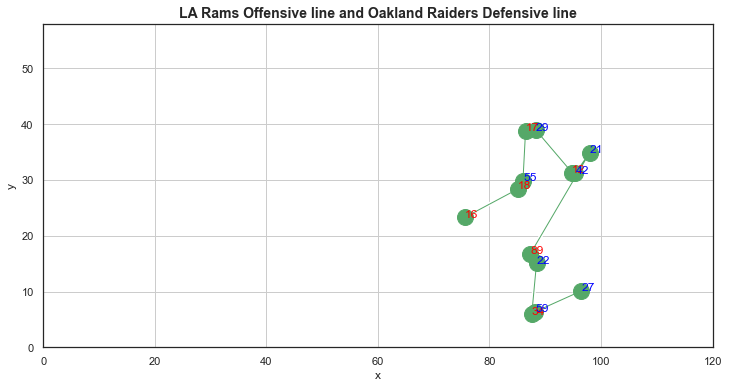

In [52]:
verts = [
    (75.59,23.30),#Jersey16
    (85.13, 28.39),# Jersey18
    (86.00,29.87),# Jersey55
    (86.47,38.82),#Jersey17
    (88.32, 38.92),#Jersey29
    (94.83, 31.27),#Jersey12
    (95.40,31.21),#Jersey42
    (97.94, 34.85),#Jersey21
    (87.34,16.78),#Jersey89
    (88.43,15.04),#Jersey22
    (87.58,5.96),#Jersey34
    (88.24,6.40),#Jersey59
    (96.47,10.11),#Jersey27
]

codes = [Path.MOVETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        ]

path = Path(verts, codes)
plt.figure(figsize=(12,8))
patch = patches.PathPatch(path, facecolor='none', lw=4)
ax =plt.gca()
ax.add_patch(patch)
xs, ys = zip(*verts)
ax.plot(xs, ys,'o-',lw=1, ms=16, color='g')
ax.text(75.59,23.30, '16', color='red')
ax.text(85.13, 28.39, '18', color='red')
ax.text(86.00,29.87, '55', color='blue')
ax.text(86.47,38.82, '17', color='red')
ax.text(88.32, 38.92, '29', color='blue')
ax.text(94.83,31.27, '12', color='red')
ax.text(95.40,31.21, '42', color='blue')
ax.text(97.94,34.85,'21', color='blue')
ax.text(87.34,16.78, '89', color='red')
ax.text(88.43,15.04, '22', color='blue')
ax.text(87.58,5.96, '34', color='red')
ax.text(88.24,6.40, '59', color='blue')
ax.text(96.47,10.11, '27', color='blue')
ax.set_xlim(0,120)
ax.set_ylim(0,58)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('LA Rams Offensive line and Oakland Raiders Defensive line',fontsize=14, fontweight='bold')
ax.set_aspect("equal")
ax.grid()
plt.show()

In [53]:
df_dataset_week5 = pd.read_csv('datasets/week5.csv', delimiter=',')
df_dataset_week5.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-10-05T00:23:49.700Z,86.56,30.79,0.0,0.0,0.0,260.09,311.40,None,238498.0,Julian Edelman,11.0,WR,1,home,2018100400,51,left,HITCH
1,2018-10-05T00:23:49.700Z,85.54,34.83,0.0,0.0,0.0,301.97,279.57,None,497240.0,Rob Gronkowski,87.0,TE,1,home,2018100400,51,left,GO
2,2018-10-05T00:23:49.700Z,90.23,23.65,0.0,0.0,0.0,275.51,261.21,None,2504211.0,Tom Brady,12.0,QB,1,home,2018100400,51,left,NaN
3,2018-10-05T00:23:49.700Z,86.47,15.91,0.0,0.0,0.0,283.76,234.57,None,2530515.0,Chris Hogan,15.0,WR,1,home,2018100400,51,left,HITCH
4,2018-10-05T00:23:49.700Z,85.62,8.77,0.0,0.0,0.0,266.56,172.17,None,2537931.0,Josh Gordon,10.0,WR,1,home,2018100400,51,left,GO


In [54]:
df_dataset_week5.isnull().sum()

time                  0
x                     0
y                     0
s                     0
a                     0
dis                   0
o                 79851
dir               79851
event                 0
nflId             79851
displayName           0
jerseyNumber      79851
position          79851
frameId               0
team                  0
gameId                0
playId                0
playDirection         0
route            836733
dtype: int64

In [55]:
median_degrees2 = df_dataset_week5['o'].median()

In [56]:
df_dataset_week5.update(df_dataset_week5['o'].fillna(median_degrees2))

In [57]:
median_distance2 = df_dataset_week5['dir'].median()

In [58]:
df_dataset_week5.update(df_dataset_week5['dir'].fillna(median_distance2))

In [59]:
df_dataset_week5.fillna(0, inplace=True)

# MINNESOTA VIKINGS vs PHILADELPHIA EAGLES

In [60]:
df_dataset_week5[(df_dataset_week5['gameId'] == 2018100709) & (df_dataset_week5['playId'] == 1215)]

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
831878,2018-10-07T21:19:26.200Z,47.99,27.86,0.02,0.02,0.01,83.71,300.23,None,2525323.0,Andrew Sendejo,34.0,SS,1,away,2018100709,1215,left,0
831879,2018-10-07T21:19:26.200Z,56.52,36.61,0.07,0.07,0.04,138.57,280.16,None,2532869.0,George Iloka,23.0,FS,1,away,2018100709,1215,left,0
831880,2018-10-07T21:19:26.200Z,58.54,18.62,1.45,0.55,0.15,31.56,333.37,None,2532948.0,Harrison Smith,22.0,FS,1,away,2018100709,1215,left,0
831881,2018-10-07T21:19:26.200Z,63.37,43.93,0.00,0.00,0.00,243.18,63.29,None,2533039.0,Alshon Jeffery,17.0,WR,1,home,2018100709,1215,left,IN
831882,2018-10-07T21:19:26.200Z,58.33,44.20,1.96,0.48,0.20,99.86,272.09,None,2540155.0,Xavier Rhodes,29.0,CB,1,away,2018100709,1215,left,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832937,2018-10-07T21:19:33.700Z,48.95,44.58,2.41,0.92,0.25,157.91,165.50,None,2552600.0,Nelson Agholor,13.0,WR,76,home,2018100709,1215,left,GO
832938,2018-10-07T21:19:33.700Z,68.51,20.82,1.58,0.58,0.16,217.55,227.89,None,2555259.0,Carson Wentz,11.0,QB,76,home,2018100709,1215,left,0
832939,2018-10-07T21:19:33.700Z,54.52,3.29,4.29,4.17,0.45,131.66,189.02,None,2560746.0,Mike Hughes,21.0,CB,76,away,2018100709,1215,left,0
832940,2018-10-07T21:19:33.700Z,55.15,35.28,3.94,1.07,0.40,192.40,184.71,None,2560995.0,Dallas Goedert,88.0,TE,76,home,2018100709,1215,left,CROSS


In [61]:
df_dataset_week5.loc[831878:831890]

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
831878,2018-10-07T21:19:26.200Z,47.99,27.86,0.02,0.02,0.01,83.71,300.23,None,2525323.0,Andrew Sendejo,34.0,SS,1,away,2018100709,1215,left,0
831879,2018-10-07T21:19:26.200Z,56.52,36.61,0.07,0.07,0.04,138.57,280.16,None,2532869.0,George Iloka,23.0,FS,1,away,2018100709,1215,left,0
831880,2018-10-07T21:19:26.200Z,58.54,18.62,1.45,0.55,0.15,31.56,333.37,None,2532948.0,Harrison Smith,22.0,FS,1,away,2018100709,1215,left,0
831881,2018-10-07T21:19:26.200Z,63.37,43.93,0.00,0.00,0.00,243.18,63.29,None,2533039.0,Alshon Jeffery,17.0,WR,1,home,2018100709,1215,left,IN
831882,2018-10-07T21:19:26.200Z,58.33,44.20,1.96,0.48,0.20,99.86,272.09,None,2540155.0,Xavier Rhodes,29.0,CB,1,away,2018100709,1215,left,0
831883,2018-10-07T21:19:26.200Z,64.86,28.75,3.42,2.50,0.35,317.00,348.85,None,2540158.0,Zach Ertz,86.0,TE,1,home,2018100709,1215,left,HITCH
831884,2018-10-07T21:19:26.200Z,58.85,23.57,1.06,0.83,0.11,109.02,340.65,None,2543459.0,Anthony Barr,55.0,OLB,1,away,2018100709,1215,left,0
831885,2018-10-07T21:19:26.200Z,59.13,26.57,1.70,4.45,0.15,70.93,18.98,None,2552312.0,Eric Kendricks,54.0,MLB,1,away,2018100709,1215,left,0
831886,2018-10-07T21:19:26.200Z,67.27,21.38,0.00,0.00,0.01,273.51,306.46,None,2552582.0,Jay Ajayi,26.0,RB,1,home,2018100709,1215,left,FLAT
831887,2018-10-07T21:19:26.200Z,64.15,35.56,0.00,0.00,0.00,259.90,72.76,None,2552600.0,Nelson Agholor,13.0,WR,1,home,2018100709,1215,left,GO


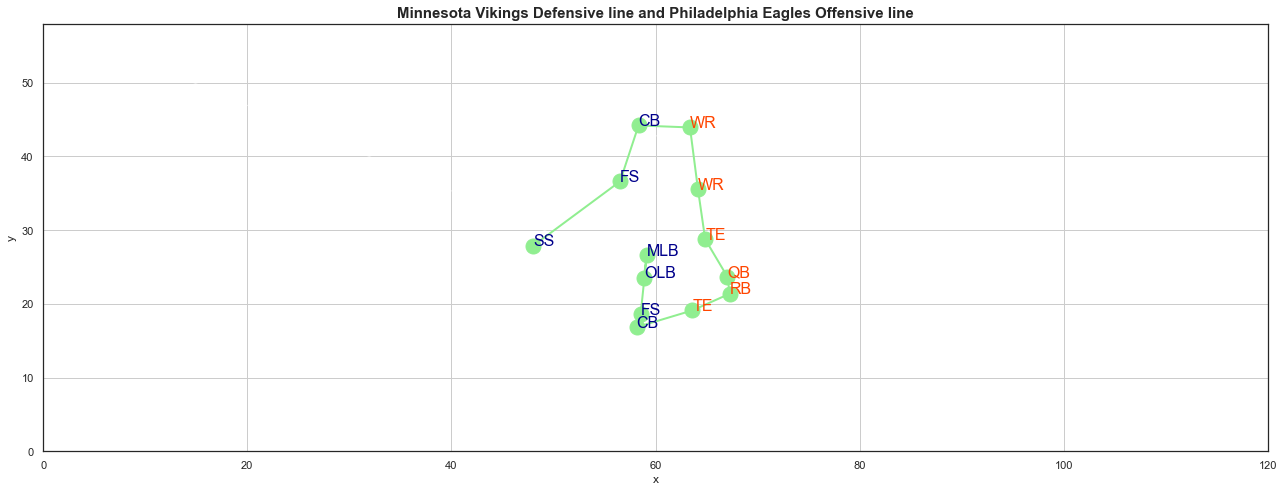

In [62]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18,7))


Path = mpath.Path
path_data = [
    (Path.MOVETO, (47.99, 27.86)),#jersey34
    (Path.CURVE4, (56.52,36.61)),#jersey23
    (Path.CURVE4, (58.33,44.20)),#jersey29
    (Path.CURVE4, (63.37,43.93)),#jersey17
    (Path.CURVE4, (64.15,35.56)),#jersey13
    (Path.CURVE4, (64.86,28.75)),#jersey86
    (Path.CURVE4, (67.02,23.71)),#jersey11
    (Path.LINETO, (67.27,21.38)),#jersey26
    (Path.CURVE4, (63.60,19.11)),#jersey88
    (Path.CURVE4, (58.14,16.84)),#jersey21
    (Path.LINETO, (58.54,18.62)),#jersey22
    (Path.CURVE4, (59.13,26.57)),#jersey54
    (Path.CURVE4, (58.85,23.57)),#jersey55
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='none', alpha=0.5)
ax.add_patch(patch)
# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'o-',color='lightgreen', ms=15,lw=2)
ax.text(47.99, 27.86, 'SS', color='darkblue',fontsize=16)
ax.text(56.52,36.61, 'FS', color='darkblue',fontsize=16)
ax.text(58.33,44.20, 'CB', color='darkblue', fontsize=16)
ax.text(63.37,43.93, 'WR', color='orangered', fontsize=16)
ax.text(64.15,35.56, 'WR', color='orangered', fontsize=16)
ax.text(64.86,28.75, 'TE', color='orangered', fontsize=16)
ax.text(67.02,23.71, 'QB', color='orangered', fontsize=16)
ax.text(67.27,21.38, 'RB', color='orangered', fontsize=16)
ax.text(63.60,19.11, 'TE', color='orangered', fontsize=16)
ax.text(58.14,16.84, 'CB', color='darkblue', fontsize=16)
ax.text(58.54,18.62, 'FS', color='darkblue', fontsize=16)
ax.text(59.13,26.57,'MLB', color='darkblue', fontsize=16)
ax.text(58.85,23.57, 'OLB', color='darkblue', fontsize=16)
ax.set_xlim(0,120)
ax.set_ylim(0,58)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Minnesota Vikings Defensive line and Philadelphia Eagles Offensive line',fontsize=15, fontweight='bold')
ax.grid(True)
plt.tight_layout()
plt.show()